In [ ]:
#Eugene Fotsing
#CTEC 298 
#Jupiter Notebook

       RT       SERIALNO  DIVISION  PUMA  REGION  ST   ADJHSG   ADJINC  WGTP  \
0       H  2022GQ0000033         9  6509       4   6  1000000  1042311     0   
1       H  2022GQ0000039         9  6501       4   6  1000000  1042311     0   
2       H  2022GQ0000041         9  8101       4   6  1000000  1042311     0   
3       H  2022GQ0000067         9  8303       4   6  1000000  1042311     0   
4       H  2022GQ0000070         9  6712       4   6  1000000  1042311     0   
...    ..            ...       ...   ...     ...  ..      ...      ...   ...   
167257  H  2022HU1446425         9  2906       4   6  1000000  1042311    32   
167258  H  2022HU1446431         9  5918       4   6  1000000  1042311    67   
167259  H  2022HU1446436         9  8301       4   6  1000000  1042311    77   
167260  H  2022HU1446447         9  2908       4   6  1000000  1042311   176   
167261  H  2022HU1446451         9  3752       4   6  1000000  1042311    70   

        NP  ...  WGTP71  WGTP72  WGTP73

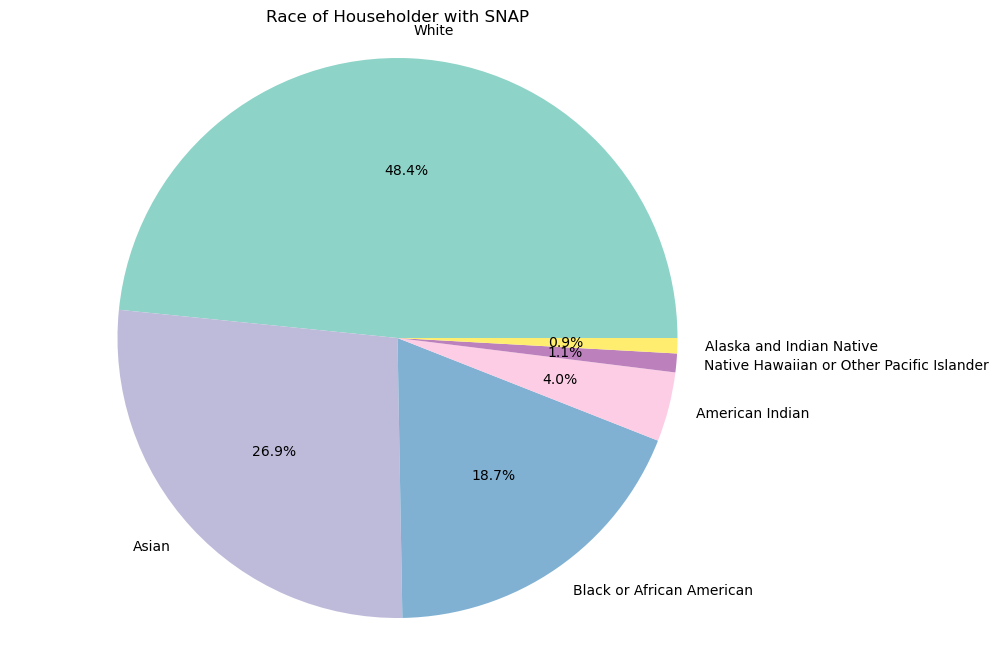

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the psam_h06 dataset
df = pd.read_csv('C:\\Users\\eugen\\OneDrive\\Desktop\\CTET 128\\psam_h06 - copy.csv')


#print the dataframe
print(df)
#select only the columns with the title "RNTP", "NP", "FS", "MRGP", "FINCP", "HHLDRRAC1P" as a seperate dataframe
df_selected = df[["RNTP", "NP", "FS", "MRGP", "FINCP", "HHLDRRAC1P"]]
print(df_selected)
#delete all rows where the cell is empty
df_selected = df_selected.dropna()
print(df_selected)
#create another seperate dataframe with the columns "HHLDRRAC1P", "FS"
df_selected2 = df_selected[["HHLDRRAC1P", "FS"]]
print(df_selected2)
#select only rows where the cell in the "FS" coloumn is 1
df_selected2 = df_selected2[df_selected2["FS"] == 1]
print(df_selected2)
# Count values in HHLDRRAC1P column
race_counts = df_selected2['HHLDRRAC1P'].value_counts()

# Calculate percentages
total = race_counts.sum()
percentages = race_counts / total * 100

# Create labels dictionary
race_labels = {
    1: 'White',
    2: 'Black or African American', 
    3: 'American Indian',
    4: 'Alaska Native',
    5: 'Alaska and Indian Native',
    6: 'Asian',
    7: 'Native Hawaiian or Other Pacific Islander',
    8: 'Multiracial',  # Combined Some other race
    9: 'Multiracial'   # Combined Two or more races
}

# Map numeric values to labels
labels = [race_labels[i] for i in percentages.index]

# Combine Multiracial categories
multiracial_mask = [label == 'Multiracial' for label in labels]
if any(multiracial_mask):
    multiracial_pct = percentages[multiracial_mask].sum()
    percentages = percentages[~percentages.index.isin([8,9])]
    percentages['Multiracial'] = multiracial_pct
    labels = [label for i, label in enumerate(labels) if not multiracial_mask[i]]
    labels.append('Multiracial')

# Filter out Multiracial category
non_multiracial_mask = [label != 'Multiracial' for label in labels]
percentages_filtered = percentages[non_multiracial_mask]
labels_filtered = [label for label in labels if label != 'Multiracial']

# Create new explode array for filtered data
explode_filtered = [0.1 if p == max(percentages_filtered) else 0 for p in percentages_filtered]

# Create pie chart without Multiracial and without exploding the largest slice
plt.figure(figsize=(10,8))
plt.pie(percentages_filtered, labels=labels_filtered,
        autopct='%1.1f%%', colors=plt.cm.Set3(np.linspace(0, 1, len(labels_filtered))))
plt.title('Race of Householder with SNAP')
plt.axis('equal')
plt.show()

          RNTP    MRGP  HHLDRRAC1P
0          NaN     NaN         NaN
1          NaN     NaN         NaN
2          NaN     NaN         NaN
3          NaN     NaN         NaN
4          NaN     NaN         NaN
...        ...     ...         ...
167257    80.0     4.0         1.0
167258     NaN  2600.0         1.0
167259     NaN     4.0         1.0
167260     NaN  1200.0         9.0
167261  1200.0     4.0         8.0

[167262 rows x 3 columns]
        HHLDRRAC1P    MRGP
0              NaN     NaN
1              NaN     NaN
2              NaN     NaN
3              NaN     NaN
4              NaN     NaN
...            ...     ...
167257         1.0     4.0
167258         1.0  2600.0
167259         1.0     4.0
167260         9.0  1200.0
167261         8.0     4.0

[167262 rows x 2 columns]
        HHLDRRAC1P    RNTP
0              NaN     NaN
1              NaN     NaN
2              NaN     NaN
3              NaN     NaN
4              NaN     NaN
...            ...     ...
167257       

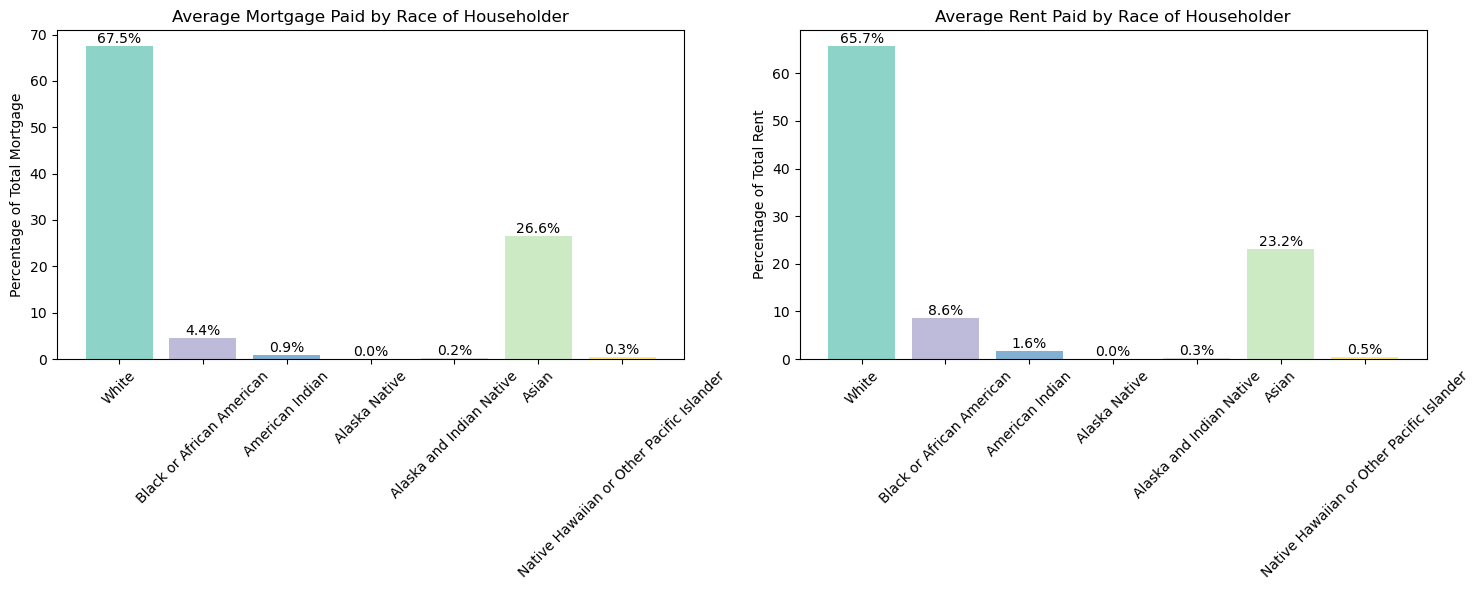

In [10]:
#create a new dataframe with the colums "RNTP", "MRGP","HHLDRRAC1P"
df_selected3 = df[["RNTP", "MRGP","HHLDRRAC1P"]]
print(df_selected3) 

#create two new dataframe with the coloums "HHLDRRAC1P","MRGP" and "HHLDRRAC1P","RNTP"
df_selected4 = df_selected3[["HHLDRRAC1P","MRGP"]]
df_selected5 = df_selected3[["HHLDRRAC1P","RNTP"]]
print(df_selected4)
print(df_selected5)


# sum all the values in the "MRGP" and "RNTP" columns by race in their respective dataframes
df_selected4 = df_selected4.groupby("HHLDRRAC1P").sum()
df_selected5 = df_selected5.groupby("HHLDRRAC1P").sum()

# Map the index to race labels
df_selected4.index = [race_labels[i] for i in df_selected4.index]
df_selected5.index = [race_labels[i] for i in df_selected5.index]

# Filter out Multiracial data (combining categories 8 and 9)
df_selected4 = df_selected4[~df_selected4.index.isin(['Multiracial'])]
df_selected5 = df_selected5[~df_selected5.index.isin(['Multiracial'])]

# Calculate total mortgage and rent amounts
total_mortgage = df_selected4['MRGP'].sum()
total_rent = df_selected5['RNTP'].sum()

# Calculate percentages
mortgage_percentages = (df_selected4['MRGP'] / total_mortgage) * 100
rent_percentages = (df_selected5['RNTP'] / total_rent) * 100

# Create color map (use the index of df_selected4 for consistent labels)
colors = plt.cm.Set3(np.linspace(0, 1, len(df_selected4.index)))

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot mortgage percentages
bars1 = ax1.bar(df_selected4.index, mortgage_percentages, color=colors)
ax1.set_title('Average Mortgage Paid by Race of Householder')
ax1.set_ylabel('Percentage of Total Mortgage')
ax1.tick_params(axis='x', rotation=45)

# Add percentage labels on top of bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

# Plot rent percentages  
bars2 = ax2.bar(df_selected5.index, rent_percentages, color=colors)
ax2.set_title('Average Rent Paid by Race of Householder')
ax2.set_ylabel('Percentage of Total Rent')
ax2.tick_params(axis='x', rotation=45)

# Add percentage labels on top of bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()